In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

# 9. This question involves the use of multiple linear regression on the Auto data set

In [2]:
auto = pd.read_csv(r'C:\Users\Kushal Garg\ML\Introduction to statistical learning\Datasets\Auto.csv')

print(auto.shape)
auto.head()


(397, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## (a) Produce a scatterplot matrix which includes all of the variables in the data set

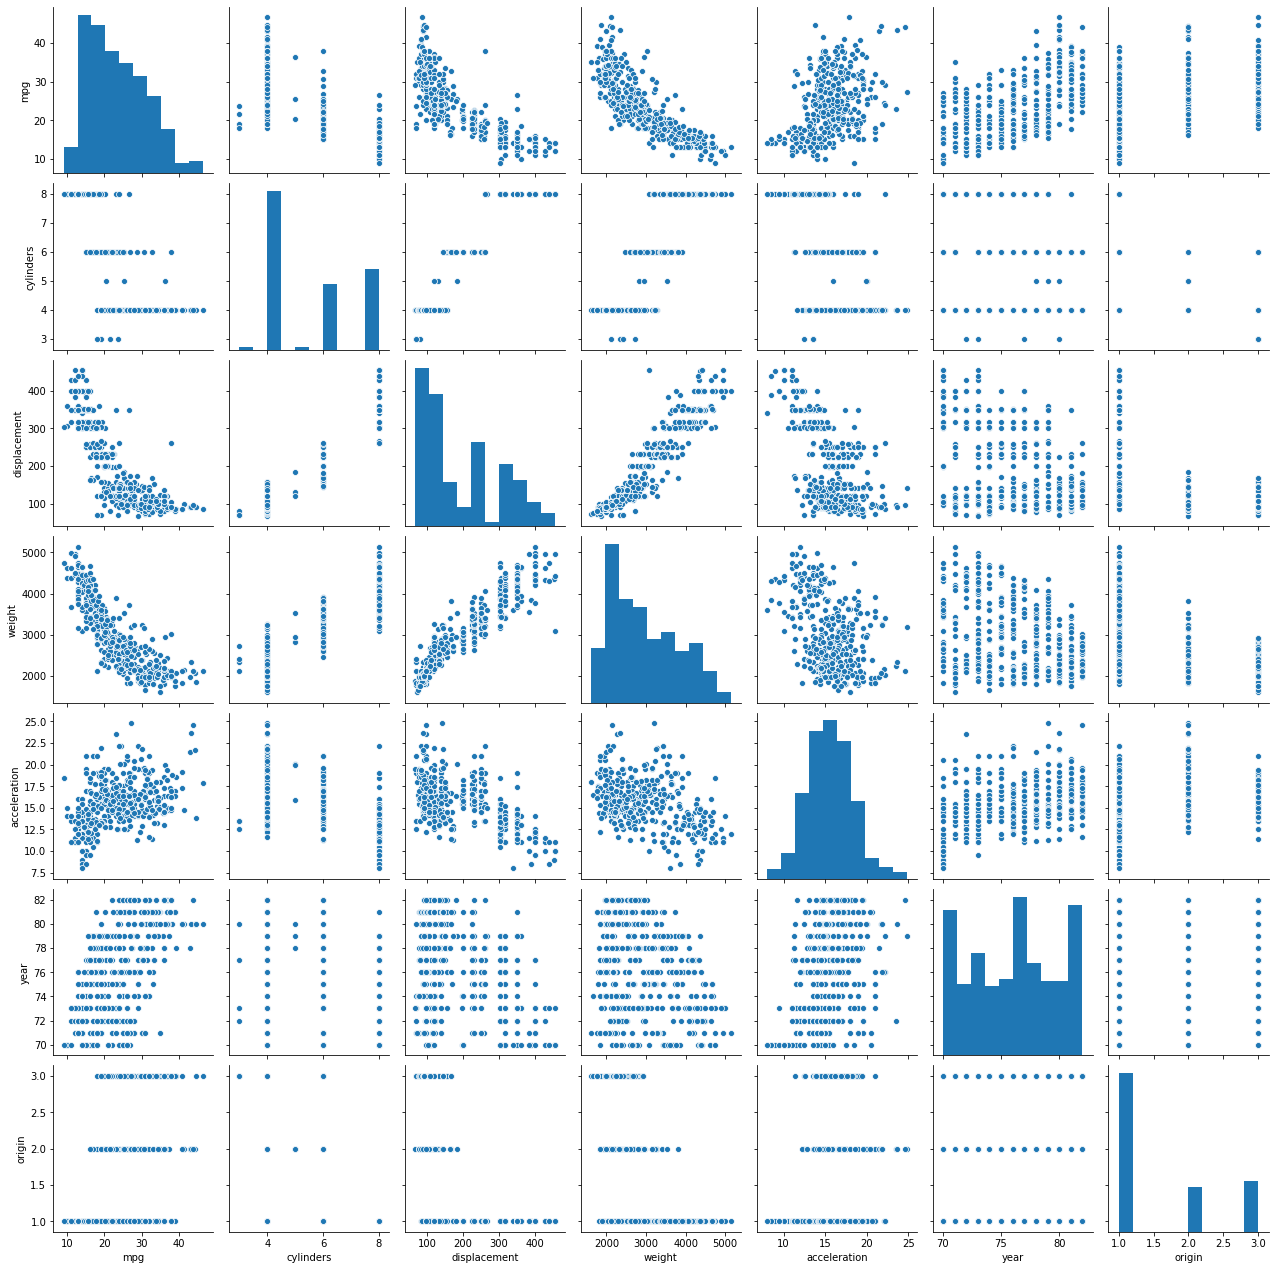

In [8]:
sns.pairplot(auto)
plt.show()

## (b) Compute the matrix of correlations between the variables using the function cor(). You will need to exclude the name variable, cor() which is qualitative.

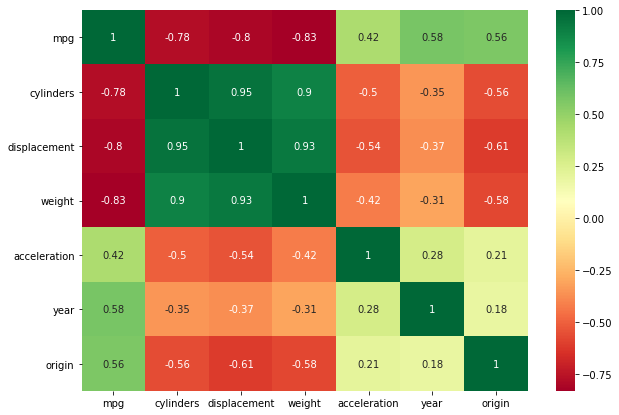

In [11]:
cor=auto.corr()
top_features=cor.index
plt.figure(figsize=(10,7))
g=sns.heatmap(auto[top_features].corr(),annot=True,cmap="RdYlGn")

In [15]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [16]:
auto['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [17]:
auto.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [18]:
auto['horsepower']=auto['horsepower'].replace('?', np.nan)
auto=auto.dropna()
auto.shape

(392, 9)

In [19]:
auto['horsepower']=auto['horsepower'].astype(np.int64)

In [20]:
x=auto.drop(['name','mpg'],axis=1)




## (c) Use the lm() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summary() function to print the results. Comment on the output.

In [21]:
import statsmodels.api as sm
X = x
X = sm.add_constant(X)     
y = auto['mpg']
result=sm.OLS(y,X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sat, 03 Oct 2020   Prob (F-statistic):          2.04e-139
Time:                        20:51:47   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

### (i) Is there a relationship between the predictors and the response?


There is a relationship between the predictors and the response (mpg): the displacement, weight, year and origin variables have small p-values.

### (ii) Which predictors appear to have a statistically significant relationship to the response?


Origin,weight, year have very significan p value of 0, displacement also has a very low p value.

### (iii) What does the coefficient for the year variable suggest?


Coefficient of year is 0.7508. It means that if we increase the value of year by i unit, kepping all other predictors fixed we would expect 0.7508 increase in the response.

## (d) Use the plot() function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers?

Text(0.5, 1.0, 'Residual Plot')

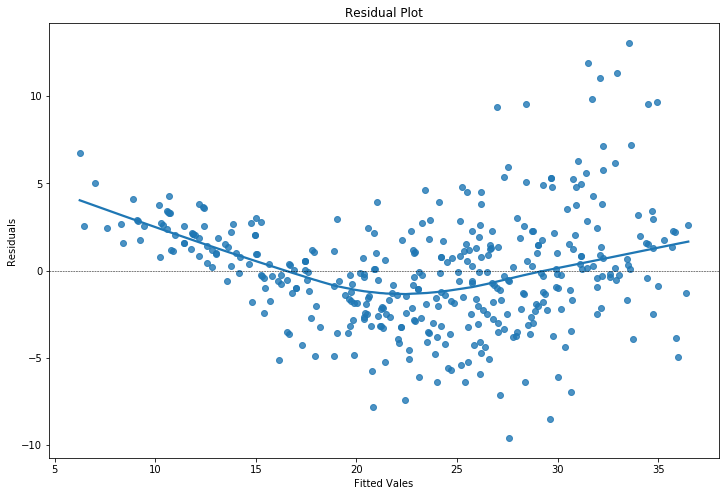

In [22]:
plt.figure(figsize = (12,8))
fitted_y=result.fittedvalues
residuals=result.resid

sns.regplot(fitted_y,residuals,lowess=True)
plt.axhline(y = 0,linewidth = 0.5,linestyle = 'dashed',color = 'black')
plt.xlabel('Fitted Vales')
plt.ylabel('Residuals')
plt.title('Residual Plot')

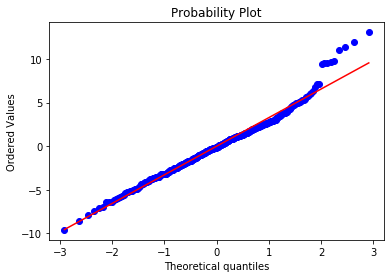

In [23]:
from scipy import stats
ax=stats.probplot(result.resid, dist='norm',plot=plt)

Text(0.5, 1.0, 'Scale-Location Plot ')

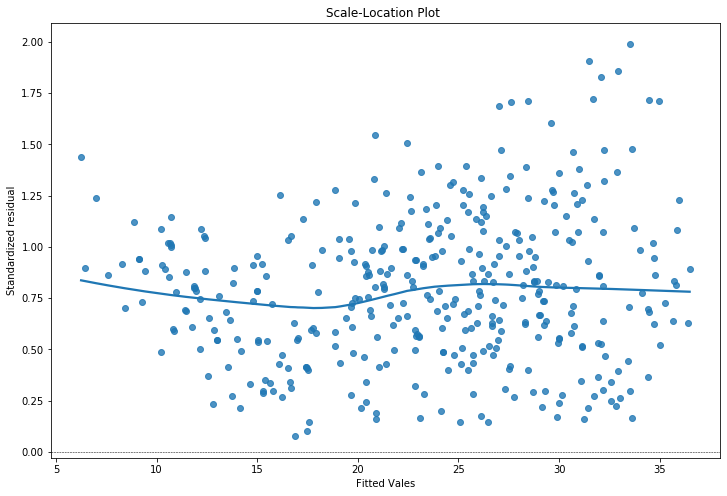

In [24]:
plt.figure(figsize = (12,8))
# normalized residuals
model_norm_residuals = result.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

sns.regplot(fitted_y,model_norm_residuals_abs_sqrt,lowess=True)
plt.axhline(y = 0,linewidth = 0.5,linestyle = 'dashed',color = 'black')
plt.xlabel('Fitted Vales')
plt.ylabel('Standardized residual')
plt.title('Scale-Location Plot ')

Text(0.5, 1.0, 'Residual-Leverage Plot ')

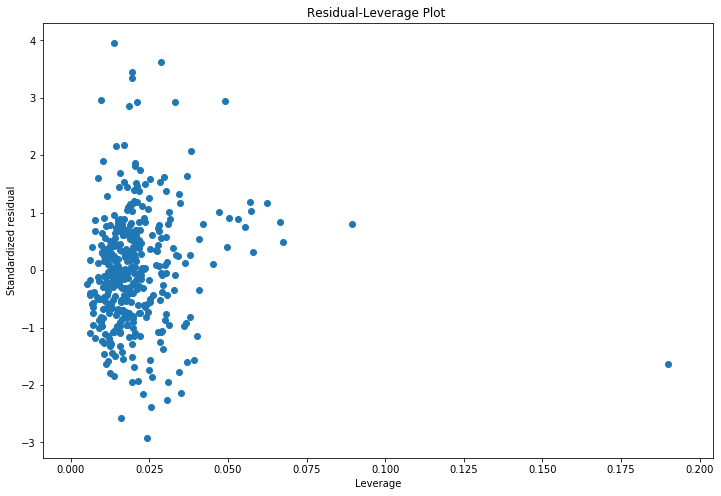

In [25]:
plt.figure(figsize = (12,8))

# leverage, from statsmodels internals
model_leverage = result.get_influence().hat_matrix_diag

plt.scatter(model_leverage, model_norm_residuals)

plt.xlabel('Leverage')
plt.ylabel('Standardized residual')
plt.title('Residual-Leverage Plot ')

#### The residuals plot indicates non-linearity in the data. The U-Shape means the fit is worse at the extreme values of the fit. The studentized residuals show multiple points are outliers ( > 3). The leverage plot shows several high leverage points. These are points that have leverages >> (p+1)/n= 8/392 ~ 0.02 Several of these points are also outliers. These points therefore strongly alter the coeffecient estimates.

## (e) Use the * and : symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?

In [26]:
x['horsepower*year']=auto.horsepower*auto.year
X = x
X = sm.add_constant(X)     
y = auto['mpg']
result=sm.OLS(y,X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     274.0
Date:                Sat, 03 Oct 2020   Prob (F-statistic):          2.52e-153
Time:                        21:06:53   Log-Likelihood:                -987.72
No. Observations:                 392   AIC:                             1993.
Df Residuals:                     383   BIC:                             2029.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -97.2279     10.077     

#### We have added one interaction term horsepower*year. For this the p-value is significant. Adding the interaction terms has resulted in the increase in R2 value from 82.1 to 85.0

## (f) Try a few different transformations of the variables, such as log(X), √X, X2. Comment on your findings

In [27]:
x['horsepower*2']=np.power(auto.horsepower,2)
X = x
X = sm.add_constant(X)     
y = auto['mpg']
result=sm.OLS(y,X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     267.1
Date:                Sat, 03 Oct 2020   Prob (F-statistic):          8.10e-159
Time:                        21:09:30   Log-Likelihood:                -971.78
No. Observations:                 392   AIC:                             1964.
Df Residuals:                     382   BIC:                             2003.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -52.3968     12.488     

#### Adding the horsepower**2 term has resulted in the increase in R2 value from 82.1 to 86.0